In [1]:
## Importing the libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

from sklearn import model_selection,metrics

from sklearn.model_selection import cross_val_score,train_test_split

In [2]:
import scipy.stats as stats

In [3]:
test_Data=pd.read_csv('Test_dataset.csv')
df_train = pd.read_csv('Train_dataset.csv')

In [4]:
df_train.shape

(3493, 34)

In [5]:
df_train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [6]:
test_Data.shape

(500, 33)

In [7]:
test_Data.head()

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,20001,"tibetan,italian",Bangalore,Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.00,1,1,...,6.0,NaN,2.0,NaN,NaN,5,2,2,6,0
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,05-09-2011,89.17,Not Specific,96.00,1,1,...,9.0,3.0,NaN,NaN,6.0,7,8,5,1,8
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,12-04-2011,84.00,Not Specific,86.00,1,1,...,6.0,3.0,NaN,NaN,NaN,9,7,5,1,5
3,20004,"tibetan,greek",-1,Near Party Hub,16-01-2005,79.38,Not Specific,74.40,0,1,...,9.0,6.0,NaN,NaN,NaN,6,7,6,4,7
4,20005,"cuban,british",Pune,Near Party Hub,10-11-2008,84.67,Not Specific,86.46,1,1,...,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


In [8]:
target=df_train['Annual Turnover']
df_train.drop('Registration Number',axis=1,inplace=True)
test_Regno=test_Data[['Registration Number']]

df_train.drop('Annual Turnover',axis=1,inplace=True)


In [9]:
test_Data.drop('Registration Number',axis=1,inplace=True)


In [10]:
test_Data.rename(columns={'Endoresed By': 'Endorsed By'}, inplace=True)


###### City

In [11]:
df_train['City']=df_train['City'].str.upper()
test_Data['City']=test_Data['City'].str.upper()

df_train['City'] = df_train['City'].replace(['BANGALORE '],'BANGALORE')
test_Data['City'] = test_Data['City'].replace(['BANGLORE'],'BANGALORE')
test_Data['City'] = test_Data['City'].replace(['BANGALORE '],'BANGALORE')


df_train['City'] = df_train['City'].replace(['GREATER NOIDA'],'NOIDA')
test_Data['City'] = test_Data['City'].replace(['GREATER NOIDA'],'NOIDA')

df_train['City'] = df_train['City'].replace(['BANGALORE '],'BANGALORE')
test_Data['City'] = test_Data['City'].replace(['BANGLORE'],'BANGALORE')

df_train['City'] = df_train['City'].replace(['NAVI MUMBAI'],'MUMBAI')
test_Data['City'] = test_Data['City'].replace(['NAVI MUMBAI'],'MUMBAI')

df_train['City'] = df_train['City'].replace(['-1'],'OTHERS')
test_Data['City'] = test_Data['City'].replace(['-1'],'OTHERS')

test_Data['City'] = test_Data['City'].replace(['BHUBANESWAR'],'BHUBANESHWAR')

test_Data['City'] = test_Data['City'].replace([' MUMBAI'],'MUMBAI')


df_train['City'] = df_train['City'].replace(['BHUBANESWAR'],'BHUBANESHWAR')


In [13]:
df_train['City'] = df_train['City'].replace(['NEW DELHI'],'DELHI')


In [14]:
df=pd.DataFrame(df_train['City'].value_counts())
df[df['City']>10].index

Index(['BANGALORE', 'OTHERS', 'NOIDA', 'HYDERABAD', 'PUNE', 'CHENNAI', 'DELHI',
       'GURGAON', 'MUMBAI', 'KOLKATA', 'JAIPUR', 'MYSORE', 'LUCKNOW',
       'BHUBANESHWAR', 'INDORE', 'CHANDIGARH', 'COIMBATORE', 'BHOPAL',
       'GHAZIABAD', 'FARIDABAD', 'AHMEDABAD', 'KOCHI/COCHIN'],
      dtype='object')

In [15]:
l=['BANGALORE', 'OTHERS', 'NOIDA', 'HYDERABAD', 'PUNE', 'CHENNAI', 'DELHI',
       'GURGAON', 'KOLKATA', 'MUMBAI', 'JAIPUR', 'MYSORE', 'LUCKNOW',
       'BHUBANESHWAR', 'INDORE', 'CHANDIGARH', 'COIMBATORE',
       'FARIDABAD', 'BHOPAL', 'AHMEDABAD','KOCHI/COCHIN']

In [16]:
df2=pd.DataFrame(test_Data['City'].value_counts())
df2[df2['City']>1].index

Index(['BANGALORE', 'OTHERS', 'NOIDA', 'HYDERABAD', 'MUMBAI', 'PUNE',
       'CHENNAI', 'GURGAON', 'NEW DELHI', 'KOLKATA', 'JAIPUR', 'LUCKNOW',
       'CHANDIGARH', 'BHUBANESHWAR', 'COIMBATORE', 'NAGPUR', 'MYSORE',
       'AHMEDABAD', 'INDORE', 'MOHALI', 'DELHI', 'GURGAON ', 'FARIDABAD',
       'DEHRADUN', 'KANPUR', 'MEERUT', 'RAIPUR', 'BHOPAL'],
      dtype='object')

In [17]:
k2=[]
k=list(df_train['City'])
for i in range(len(k)):
    if k[i] in l:
        k2.append(k[i])
    else:
        k2.append('OTHERS')
df_train['City']=k2
    

In [18]:
k2=[]
k=list(test_Data['City'])
for i in range(len(k)):
    if k[i] in l:
        k2.append(k[i])
    else:
        k2.append('OTHERS')
test_Data['City']=k2
    

In [19]:
city_test_dummy=pd.get_dummies(test_Data['City'],drop_first=True)
city_dummy=pd.get_dummies(df_train['City'],drop_first=True)

In [20]:
city_dummy.shape

(3493, 20)

In [21]:
city_test_dummy.shape

(500, 20)

In [22]:
df_train.drop('City',axis=1,inplace=True)
test_Data.drop('City',axis=1,inplace=True)

###### Comedy Gigs Rating Value Deals Rating Live Sports Rating

In [23]:
df_train.drop(['Comedy Gigs Rating','Value Deals Rating','Live Sports Rating'],axis=1,inplace=True)
test_Data.drop(['Comedy Gigs Rating','Value Deals Rating','Live Sports Rating'],axis=1,inplace=True)

###### Cuisine

In [24]:
df_train['Cuisine']=df_train['Cuisine'].str.upper()

test_Data['Cuisine']=test_Data['Cuisine'].str.upper()

In [26]:
cuisine= df_train["Cuisine"]. str. split(",", n = 1, expand = True)
cuisine[0].unique()

array(['INDIAN', 'TIBETAN', 'TURKISH', 'IRISH', 'CHINESE', 'ALGERIAN',
       'WELSH', 'PERUVIAN', 'JAPANESE', 'BRITISH', 'NIGERIAN', 'POLISH',
       'CUBAN', 'SWEDISH', 'HAWAIIAN'], dtype=object)

In [27]:
cuisine[1].unique()

array(['IRISH', 'ITALIAN', 'NIGERIAN', 'BELGIAN', 'GREEK', 'SALVADORIAN',
       'THAI', 'CUBAN', 'JAPANESE', 'CAJUN', 'ALGERIAN', 'JEWISH',
       'BRITISH', 'KOREAN', 'SAPNISH', 'LATVIAN'], dtype=object)

In [28]:
col=[]
col=list(cuisine[0].drop_duplicates())

for i in cuisine[1]:
    if i not in col:
        col.append(i)

cuisine_dummy=pd.DataFrame(columns=col)

for i in col:
    k=[]
    for j in range(len(cuisine)):
        if i==cuisine[0].iloc[j] or i ==cuisine[1].iloc[j]:
            k.append(1)
        else:
            k.append(0)
    cuisine_dummy[i]=k

In [29]:
cuisine_test= test_Data["Cuisine"]. str. split(",", n = 1, expand = True)
col=[]
col=list(cuisine_test[0].drop_duplicates())

for i in cuisine_test[1]:
    if i not in col:
        col.append(i)

cuisine_test_dummy=pd.DataFrame(columns=col)

for i in col:
    k=[]
    for j in range(len(cuisine_test)):
        if i==cuisine_test[0].iloc[j] or i ==cuisine_test[1].iloc[j]:
            k.append(1)
        else:
            k.append(0)
    cuisine_test_dummy[i]=k

In [30]:
df_train.drop('Cuisine',axis=1,inplace=True)
test_Data.drop('Cuisine',axis=1,inplace=True)

###### Restaurant Location

In [31]:
df_train['Restaurant Location'].value_counts()

Near Party Hub       2658
Near Business Hub     835
Name: Restaurant Location, dtype: int64

###### Opening day

In [32]:
#converting it into date time
df_train['Opening Day of Restaurant']=pd.to_datetime(df_train['Opening Day of Restaurant'])
old=pd.DataFrame(columns=['years_old'])
old['years_old']=2021-df_train['Opening Day of Restaurant'].dt.year


In [33]:
old['years_old'].value_counts()

11    850
10    727
12    691
13    446
14    283
9     264
15    111
16     50
8      26
17     23
18     11
19      5
20      2
21      1
7       1
5       1
25      1
Name: years_old, dtype: int64

In [34]:
k=[]
for i in old['years_old']:
    if i <=10:
        k.append('LessThanEq10Y')
    elif i>10 and i<=15:
        k.append('LessThanEq15Y-10Y')
    else:
        k.append('GreaterThan15Y')
df_train['Opening Day of Restaurant']=k
df_train.rename(columns={'Opening Day of Restaurant':'Years_Old'},inplace=True)

In [35]:
#converting it into date time
test_Data['Opening Day of Restaurant']=pd.to_datetime(test_Data['Opening Day of Restaurant'])
old=pd.DataFrame(columns=['years_old'])
old['years_old']=2021-test_Data['Opening Day of Restaurant'].dt.year
k=[]
for i in old['years_old']:
    if i <=10:
        k.append('LessThanEq10Y')
    elif i>10 and i<=15:
        k.append('LessThanEq15Y-10Y')
    else:
        k.append('GreaterThan15Y')
test_Data['Opening Day of Restaurant']=k
test_Data.rename(columns={'Opening Day of Restaurant':'Years_Old'},inplace=True)

###### Facebook and Instagram Popularity

Facebook Popularity Quotient     77.938715
Instagram Popularity Quotient    74.404684
dtype: float64 
 Facebook Popularity Quotient     79.00
Instagram Popularity Quotient    74.05
dtype: float64


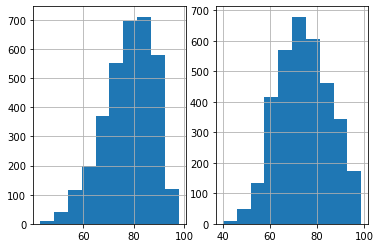

In [36]:
popularity=df_train[['Facebook Popularity Quotient','Instagram Popularity Quotient']].copy(deep=True)
print(popularity.mean(),'\n',popularity.median())
plt.subplot(1,2,1)
popularity['Facebook Popularity Quotient'].hist()
plt.subplot(1,2,2)
popularity['Instagram Popularity Quotient'].hist()
plt.show()

In [37]:
popularity.fillna(0,inplace=True)
k=[]
val=0
for i in range(len(popularity)):
    if popularity['Facebook Popularity Quotient'].iloc[i]==0 and popularity['Instagram Popularity Quotient'].iloc[i]==0:
        val=76.525
        k.append(val)
    elif popularity['Facebook Popularity Quotient'].iloc[i]==0 and popularity['Instagram Popularity Quotient'].iloc[i]>0:
        val=popularity['Instagram Popularity Quotient'].iloc[i]
        k.append(val)
    elif popularity['Facebook Popularity Quotient'].iloc[i]>0 and popularity['Instagram Popularity Quotient'].iloc[i]==0:
        val=popularity['Facebook Popularity Quotient'].iloc[i]
        k.append(val)    
    else:
        val=(popularity['Facebook Popularity Quotient'].iloc[i]+popularity['Instagram Popularity Quotient'].iloc[i])/2
        k.append(val)

df_train['Facebook Popularity Quotient']=k

df_train.rename(columns={'Facebook Popularity Quotient':'Popularity'},inplace=True)

df_train.drop('Instagram Popularity Quotient',axis=1,inplace=True)

Facebook Popularity Quotient     77.54124
Instagram Popularity Quotient    74.75326
dtype: float64 
 Facebook Popularity Quotient     79.0
Instagram Popularity Quotient    75.0
dtype: float64


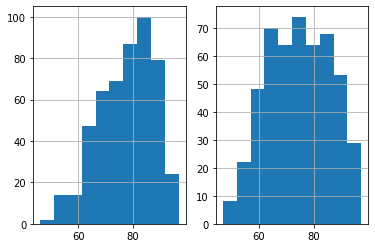

In [38]:
popularity=test_Data[['Facebook Popularity Quotient','Instagram Popularity Quotient']].copy(deep=True)
print(popularity.mean(),'\n',popularity.median())
plt.subplot(1,2,1)
popularity['Facebook Popularity Quotient'].hist()
plt.subplot(1,2,2)
popularity['Instagram Popularity Quotient'].hist()
plt.show()

In [39]:
popularity.fillna(0,inplace=True)
k=[]
val=0
for i in range(len(popularity)):
    if popularity['Facebook Popularity Quotient'].iloc[i]==0 and popularity['Instagram Popularity Quotient'].iloc[i]==0:
        val=76.525
        k.append(val)
    elif popularity['Facebook Popularity Quotient'].iloc[i]==0 and popularity['Instagram Popularity Quotient'].iloc[i]>0:
        val=popularity['Instagram Popularity Quotient'].iloc[i]
        k.append(val)
    elif popularity['Facebook Popularity Quotient'].iloc[i]>0 and popularity['Instagram Popularity Quotient'].iloc[i]==0:
        val=popularity['Facebook Popularity Quotient'].iloc[i]
        k.append(val)    
    else:
        val=(popularity['Facebook Popularity Quotient'].iloc[i]+popularity['Instagram Popularity Quotient'].iloc[i])/2
        k.append(val)

test_Data['Facebook Popularity Quotient']=k

test_Data.rename(columns={'Facebook Popularity Quotient':'Popularity'},inplace=True)

test_Data.drop('Instagram Popularity Quotient',axis=1,inplace=True)

###### Endorsed By

In [40]:
df_train['Endorsed By'].value_counts()

Not Specific        1961
Tier A Celebrity    1500
Local Celebrity       32
Name: Endorsed By, dtype: int64

In [41]:
data=df_train[['Endorsed By']].copy(deep=True)
data['revenue']=target

In [42]:
t1=data[data['Endorsed By']=='Tier A Celebrity']['revenue']
t2=data[data['Endorsed By']=='Not Specific']['revenue']
t3=data[data['Endorsed By']=='Local Celebrity']['revenue']

stats.f_oneway(t1,t2,t3)

F_onewayResult(statistic=5.774935113353456, pvalue=0.0031341404982070382)

###### FireAudit

In [43]:
data=pd.DataFrame(df_train['Fire Audit'])
data['revenue']=target
t1=data[data['Fire Audit']==1]['revenue']
t2=data[data['Fire Audit']==0]['revenue']
stats.ttest_ind(t1,t2)

Ttest_indResult(statistic=1.8366506458900105, pvalue=0.06634645904267522)

###### Liquor

In [44]:
data=pd.DataFrame(df_train['Liquor License Obtained'])
data['revenue']=target
t1=data[data['Liquor License Obtained']==1]['revenue']
t2=data[data['Liquor License Obtained']==0]['revenue']
stats.ttest_ind(t1,t2)

Ttest_indResult(statistic=1.4859242314054586, pvalue=0.13738946115201162)

###### Multiplex

In [45]:
data=pd.DataFrame(df_train['Situated in a Multi Complex'])
data['revenue']=target
t1=data[data['Situated in a Multi Complex']==1]['revenue']
t2=data[data['Situated in a Multi Complex']==0]['revenue']
stats.ttest_ind(t1,t2)

Ttest_indResult(statistic=-3.365832083952008, pvalue=0.0007713795163565877)

###### Dedicated Parking

In [46]:
data=pd.DataFrame(df_train['Dedicated Parking'])
data['revenue']=target
t1=data[data['Dedicated Parking']==1]['revenue']
t2=data[data['Dedicated Parking']==0]['revenue']
stats.ttest_ind(t1,t2)

Ttest_indResult(statistic=1.4338471765221668, pvalue=0.15170543786718912)

###### Open Sitting

In [47]:
data=pd.DataFrame(df_train['Open Sitting Available'])
data['revenue']=target
t1=data[data['Open Sitting Available']==1]['revenue']
t2=data[data['Open Sitting Available']==0]['revenue']
stats.ttest_ind(t1,t2)

Ttest_indResult(statistic=0.06359374834497598, pvalue=0.9492973506232871)

###### Restaurant tier 
###### Restaurant city tier

In [48]:
data=df_train[['Resturant Tier', 'Restaurant Type',
       'Restaurant Theme', 'Restaurant Zomato Rating', 'Restaurant City Tier',]]
data=data.astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Resturant Tier            3444 non-null   object
 1   Restaurant Type           3493 non-null   object
 2   Restaurant Theme          3493 non-null   object
 3   Restaurant Zomato Rating  3493 non-null   object
 4   Restaurant City Tier      3493 non-null   object
dtypes: object(5)
memory usage: 136.6+ KB


In [49]:
data.describe(include='all')

,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier
count,3444.0,3493,3493,3493,3493
unique,2.0,4,34,6,2
top,2.0,Bar,Arabian,3,0
freq,3191.0,3235,1373,1654,2440


In [50]:
pd.crosstab(df_train['Resturant Tier'],df_train['Restaurant City Tier'])

Restaurant City Tier,0,1
Resturant Tier,,
1.0,136,117
2.0,2269,922


In [51]:
df_train['Resturant Tier'].value_counts()

2.0    3191
1.0     253
Name: Resturant Tier, dtype: int64

In [52]:
data=pd.DataFrame(df_train['Resturant Tier'])
data['revenue']=target
t1=data[data['Resturant Tier']==2]['revenue']
t2=data[data['Resturant Tier']==1]['revenue']
stats.ttest_ind(t1,t2)

Ttest_indResult(statistic=-11.049332420287769, pvalue=6.471144801782937e-28)

In [53]:
data=pd.DataFrame(df_train['Restaurant City Tier'])
data['revenue']=target
t1=data[data['Restaurant City Tier']==1]['revenue']
t2=data[data['Restaurant City Tier']==0]['revenue']
stats.ttest_ind(t1,t2)

Ttest_indResult(statistic=0.5880300273393511, pvalue=0.5565501743935863)

In [54]:
df_train['Resturant Tier'].fillna(2,inplace=True)

In [55]:
test_Data['Resturant Tier'].value_counts()

2    466
1     34
Name: Resturant Tier, dtype: int64

In [56]:
data=pd.DataFrame(df_train['Resturant Tier'])
data['revenue']=target
t1=data[data['Resturant Tier']==2]['revenue']
t2=data[data['Resturant Tier']==1]['revenue']
stats.ttest_ind(t1,t2)

Ttest_indResult(statistic=-10.735586009550028, pvalue=1.7859428450980634e-26)

###### Restaurant Type

In [57]:
df_train['Restaurant Type'].value_counts()

Bar                         3235
Caffee                       212
Gastro Bar                    45
Buffet/Family Restaurant       1
Name: Restaurant Type, dtype: int64

In [58]:
test_Data['Restaurant Type'].value_counts()

Bar                         460
Caffee                       31
Gastro Bar                    8
Buffet/Family Restaurant      1
Name: Restaurant Type, dtype: int64

###### Restaurant Zomato Rating

In [59]:
df_train['Restaurant Zomato Rating'].value_counts()

3    1654
2    1228
4     417
1     143
5      38
0      13
Name: Restaurant Zomato Rating, dtype: int64

In [60]:
k=[]
for i in df_train['Restaurant Zomato Rating']:
    if i<2:
        k.append('BelowAvg')
    elif i>=2 and i<4:
        k.append('Avg')
    else:
        k.append('AboveAvg')
df_train['Restaurant Zomato Rating']=k

In [61]:
test_Data['Restaurant Zomato Rating'].value_counts()

3    223
2    188
4     66
1     18
5      5
Name: Restaurant Zomato Rating, dtype: int64

In [62]:
k=[]
for i in test_Data['Restaurant Zomato Rating']:
    if i<2:
        k.append('BelowAvg')
    elif i>=2 and i<4:
        k.append('Avg')
    else:
        k.append('AboveAvg')
test_Data['Restaurant Zomato Rating']=k

###### Restaurant THeme

In [63]:
df_train['Restaurant Theme'].value_counts()
# all the names other than arabian ,greek,90s,nature,parsi,chinese will be concidered "others" 

Arabian      1373
Greek        1030
90's          584
Nature        179
Parsi         103
Chinese        74
Delicio        23
Molino         22
English        19
Belise         14
Downtown       10
Moonrise       10
Mise En         7
TheGem          6
Carbone         4
Petit           4
Marco           4
Picante         3
Benedicta       3
Umami           3
Cafepro         2
Savory          2
Bettaso         2
Resca           2
Cinnamon        1
Italica         1
Grand           1
Bakery          1
Piquant         1
Ambiance        1
Flavors         1
Sage            1
Spoon           1
LaCuisine       1
Name: Restaurant Theme, dtype: int64

In [64]:
test_Data['Restaurant Theme'].value_counts()

Arabian      219
Greek        133
90's          75
Nature        22
Parsi         18
Chinese        8
Molino         7
Delicio        4
Moonrise       3
Mise En        2
Carbone        2
Belise         1
Ambiance       1
Petit          1
Picante        1
Benedicta      1
Marco          1
English        1
Name: Restaurant Theme, dtype: int64

In [65]:
k=['Arabian','Greek',"90's",'Nature','Parsi','Chinese']
l=[]
for i in df_train['Restaurant Theme']:
    if i not in k:
        l.append('Others')
    else:
        l.append(i)
df_train['Restaurant Theme']=l

l=[]
for i in test_Data['Restaurant Theme']:
    if i not in k:
        l.append('Others')
    else:
        l.append(i)
test_Data['Restaurant Theme']=l

In [66]:
df_train['Restaurant Theme'].value_counts()


Arabian    1373
Greek      1030
90's        584
Nature      179
Others      150
Parsi       103
Chinese      74
Name: Restaurant Theme, dtype: int64

In [67]:
test_Data['Restaurant Theme'].value_counts()

Arabian    219
Greek      133
90's        75
Others      25
Nature      22
Parsi       18
Chinese      8
Name: Restaurant Theme, dtype: int64

###### Order Wait Time	|| Staff Responsivness	|| Value for Money	|| Hygiene Rating	|| Food Rating	|| Overall Restaurant Rating	||
  #### Live Music Rating || Ambience

In [68]:
df_train.columns

Index(['Restaurant Location', 'Years_Old', 'Popularity', 'Endorsed By',
       'Fire Audit', 'Liquor License Obtained', 'Situated in a Multi Complex',
       'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier',
       'Restaurant Type', 'Restaurant Theme', 'Restaurant Zomato Rating',
       'Restaurant City Tier', 'Order Wait Time', 'Staff Responsivness',
       'Value for Money', 'Hygiene Rating', 'Food Rating',
       'Overall Restaurant Rating', 'Live Music Rating', 'Ambience', 'Lively',
       'Service', 'Comfortablility', 'Privacy'],
      dtype='object')

In [69]:
data=df_train[['Order Wait Time', 'Staff Responsivness', 'Value for Money',
       'Hygiene Rating', 'Food Rating', 'Overall Restaurant Rating',
       'Live Music Rating','Ambience','Lively', 'Service', 'Comfortablility',
       'Privacy']].copy(deep=True)

In [70]:
data_test_rating=test_Data[['Order Wait Time', 'Staff Responsivness', 'Value for Money',
       'Hygiene Rating', 'Food Rating', 'Overall Restaurant Rating',
       'Live Music Rating','Ambience','Lively', 'Service', 'Comfortablility',
       'Privacy']].copy(deep=True)

In [71]:
data.head()

,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,2,5,5,5,7,10.0,4.0,8.0,8,6,6,6
1,6,6,6,7,8,9.0,NaN,5.0,7,7,3,8
2,2,6,5,3,7,8.0,3.0,7.0,10,5,2,8
3,7,6,5,6,8,9.0,6.0,7.0,7,4,3,5
4,10,5,6,4,8,6.0,NaN,NaN,6,2,4,6


In [72]:
print(data['Live Music Rating'].mean())
print(data['Live Music Rating'].median())
print(data['Ambience'].mean())
print(data['Ambience'].median())


4.01282991202346
4.0
6.423010380622838
7.0


In [73]:
df_train['Live Music Rating'].fillna(4,inplace=True)
data['Live Music Rating'].fillna(4,inplace=True)# replacing by median
df_train['Ambience'].fillna(7,inplace=True)
data['Ambience'].fillna(7,inplace=True)# replacing by median
df_train['Overall Restaurant Rating'].fillna(7,inplace=True)
data['Overall Restaurant Rating'].fillna(7,inplace=True)

In [74]:
test_Data['Live Music Rating'].fillna(4,inplace=True)
data_test_rating['Live Music Rating'].fillna(4,inplace=True)# replacing by median
test_Data['Ambience'].fillna(7,inplace=True)
data_test_rating['Ambience'].fillna(7,inplace=True)# replacing by median

In [75]:
df_train['Overall Restaurant Rating'].fillna(9.0,inplace=True)
data['Overall Restaurant Rating'].fillna(9.0,inplace=True)

In [76]:
test_Data['Overall Restaurant Rating'].fillna(9.0,inplace=True)
data_test_rating['Overall Restaurant Rating'].fillna(9.0,inplace=True)

In [77]:
data.columns

Index(['Order Wait Time', 'Staff Responsivness', 'Value for Money',
       'Hygiene Rating', 'Food Rating', 'Overall Restaurant Rating',
       'Live Music Rating', 'Ambience', 'Lively', 'Service', 'Comfortablility',
       'Privacy'],
      dtype='object')

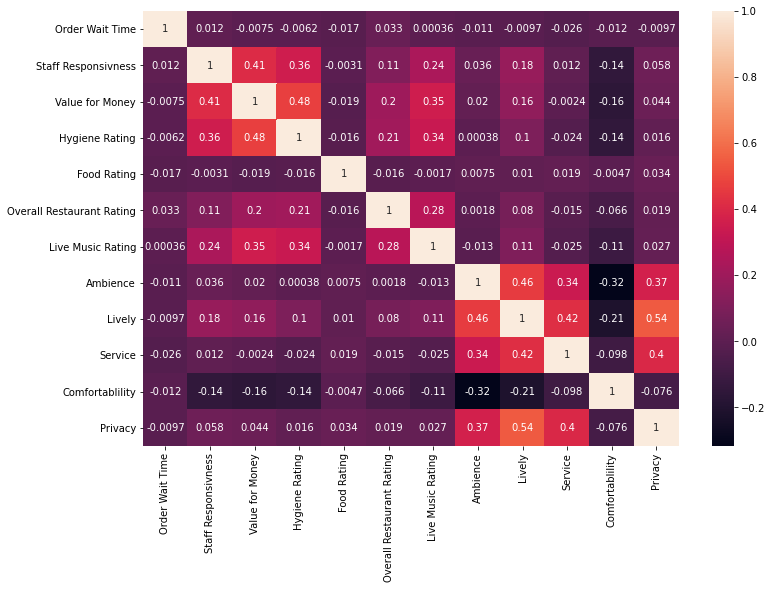

In [78]:
plt.rcParams['figure.figsize']=[12,8]
sns.heatmap(data.corr(),annot=True)

    Overall Restaiurant Rating, Overall wait time and Food rating shows no collinearity with any variable

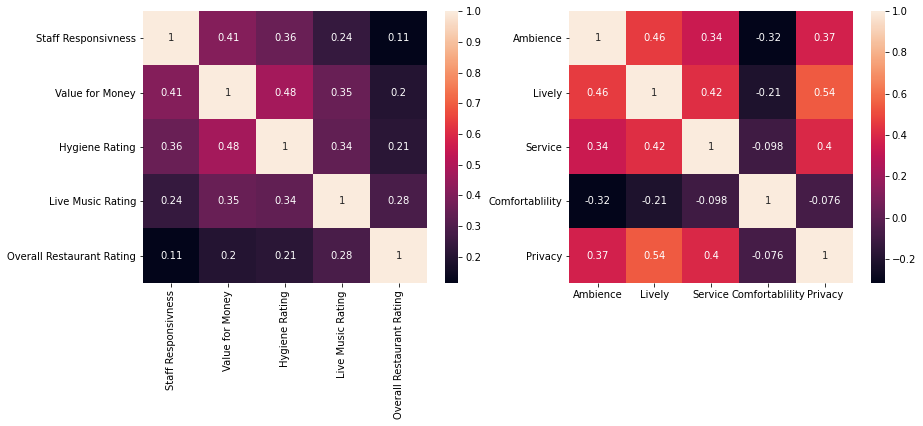

In [79]:
plt.rcParams['figure.figsize']=[14,5]
plt.subplot(1,2,1)
sns.heatmap(data[[ 'Staff Responsivness', 'Value for Money',
       'Hygiene Rating','Live Music Rating','Overall Restaurant Rating']].corr(),annot=True)
plt.subplot(1,2,2)
sns.heatmap(data[['Ambience', 'Lively', 'Service', 'Comfortablility',
       'Privacy']].corr(),annot=True)

    we can see the 2 heat mat forming 2 groups 
    'Ambience', 'Lively', 'Service', 'Privacy'

    'Staff Responsivness', 'Value for Money','Hygiene Rating','Live Music Rating'

In [80]:
group2=(data['Ambience']+data['Lively']+data['Service']+data['Privacy'])/4
group1=(data['Staff Responsivness']+data['Value for Money']+data['Hygiene Rating']+data['Live Music Rating'])/4
data['group1']=group1
data['group2']=group2

In [81]:
group2_test=(data_test_rating['Ambience']+data_test_rating['Lively']+data_test_rating['Service']+data_test_rating['Privacy'])/4
group1_test=(data_test_rating['Staff Responsivness']+data_test_rating['Value for Money']+
             data_test_rating['Hygiene Rating']+data_test_rating['Live Music Rating'])/4
data_test_rating['group1']=group1_test
data_test_rating['group2']=group2_test

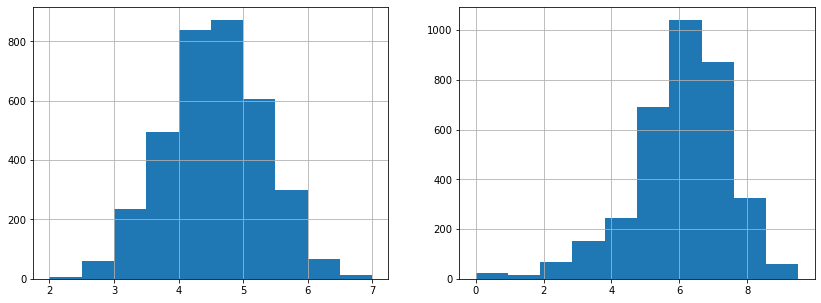

In [82]:
plt.subplot(1,2,1)
group1.hist()
plt.subplot(1,2,2)
group2.hist()

In [83]:
data.columns

Index(['Order Wait Time', 'Staff Responsivness', 'Value for Money',
       'Hygiene Rating', 'Food Rating', 'Overall Restaurant Rating',
       'Live Music Rating', 'Ambience', 'Lively', 'Service', 'Comfortablility',
       'Privacy', 'group1', 'group2'],
      dtype='object')

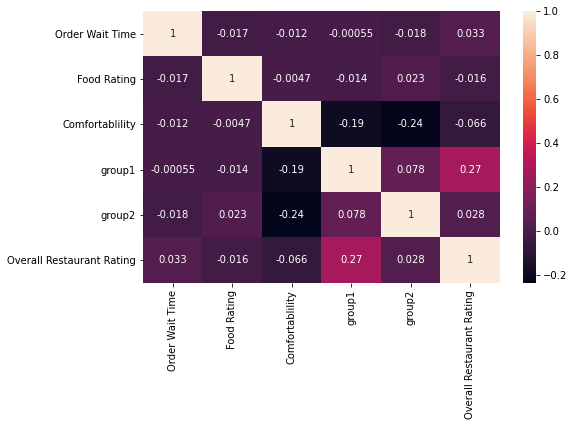

In [84]:
plt.rcParams['figure.figsize']=[8,5]

sns.heatmap(data[['Order Wait Time','Food Rating', 'Comfortablility','group1', 'group2','Overall Restaurant Rating']].corr(),
            annot=True)

In [85]:
## dropping from main dataframe
df_train.drop(['Ambience', 'Lively', 'Service', 'Privacy','Staff Responsivness',
               'Value for Money','Hygiene Rating','Live Music Rating'],axis=1,inplace=True)

## dropping from main dataframe
test_Data.drop(['Ambience', 'Lively', 'Service', 'Privacy','Staff Responsivness',
               'Value for Money','Hygiene Rating','Live Music Rating'],axis=1,inplace=True)


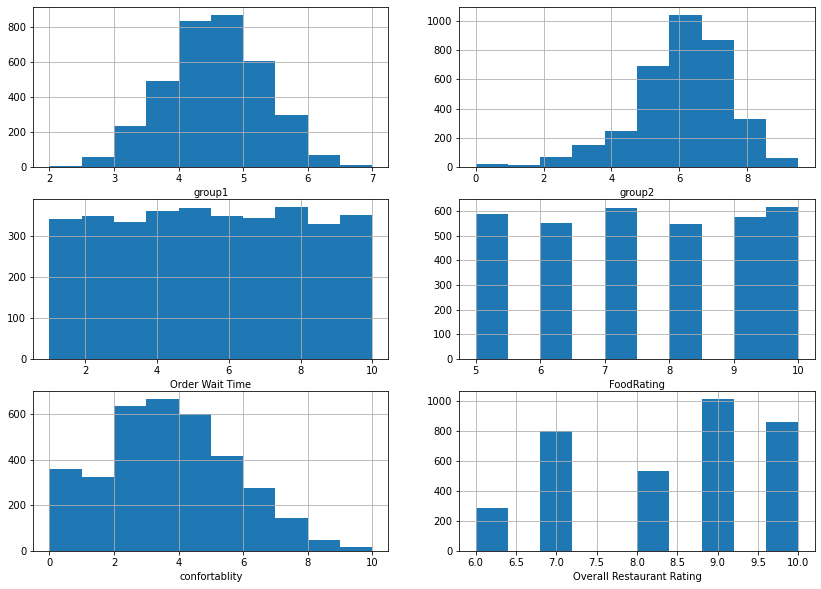

In [86]:
plt.rcParams['figure.figsize']=[14,10]
plt.subplot(3,2,1)
group1.hist()
plt.xlabel('group1')
plt.subplot(3,2,2)
group2.hist()
plt.xlabel('group2')
plt.subplot(3,2,3)
data['Order Wait Time'].hist()
plt.xlabel('Order Wait Time')
plt.subplot(3,2,4)
data['Food Rating'].hist()
plt.xlabel('FoodRating')
plt.subplot(3,2,5)
data['Comfortablility'].hist()
plt.xlabel('confortablity')
plt.subplot(3,2,6)
data['Overall Restaurant Rating'].hist()
plt.xlabel('Overall Restaurant Rating')
plt.show()

In [87]:
for i in data[['Order Wait Time','Food Rating', 'Comfortablility','Overall Restaurant Rating']]:
    print(data[i].value_counts(),'\n')

8     371
5     368
4     360
10    351
2     349
6     349
7     343
1     340
3     334
9     328
Name: Order Wait Time, dtype: int64 

10    618
7     611
5     588
9     576
6     552
8     548
Name: Food Rating, dtype: int64 

3     669
2     638
4     603
5     417
0     361
1     323
6     276
7     142
8      47
9      12
10      5
Name: Comfortablility, dtype: int64 

9.0     1016
10.0     859
7.0      797
8.0      533
6.0      288
Name: Overall Restaurant Rating, dtype: int64 



In [88]:
k=[]
for i in data['Food Rating']:
    if i<7:
        k.append('LowFoodRating')
    elif i>8:
        k.append('HighFoodRating')
    else:
        k.append('MediumFoodRating')
df_train['Food Rating']=k
k=[]
for i in data['Overall Restaurant Rating']:
    if i<7:
        k.append('LowOverallRating')
    elif i>8:
        k.append('HighOverallRating')
    else:
        k.append('MediumOverallRating')
df_train['Overall Restaurant Rating']=k

k=[]
for i in data['Order Wait Time']:
    if i<6:
        k.append('LowOrderWaitTime')
    else:
        k.append('HighOrderWaitTime')

df_train['Order Wait Time']=k

#G2-'Ambience', 'Lively', 'Service', 'Privacy',=Mood
#G1-'Staff Responsivness','Value for Money','Hygiene Rating','Live Music Rating'=Hospitality

k=[]
for i in data['group1']:
    if i<4:
        k.append('LowHospitality')
    elif i>6:
        k.append('HighHospitality')
    else:
        k.append('MediumHospitality')
df_train['Group1_Hospitality']=k
k=[]
for i in data['group2']:
    if i<4:
        k.append('LowMood')
    elif i>6:
        k.append('HighMood')
    else:
        k.append('MediumMood')
df_train['Group2_Mood']=k
k=[]
for i in data['Comfortablility']:
    if i<4:
        k.append('LowComfort')
    elif i>6:
        k.append('HighComfort')
    else:
        k.append('MediumComfort')
df_train['Comfortablility']=k

In [89]:
k=[]
for i in data_test_rating['Food Rating']:
    if i<7:
        k.append('LowFoodRating')
    elif i>8:
        k.append('HighFoodRating')
    else:
        k.append('MediumFoodRating')
test_Data['Food Rating']=k
k=[]
for i in data_test_rating['Overall Restaurant Rating']:
    if i<7:
        k.append('LowOverallRating')
    elif i>8:
        k.append('HighOverallRating')
    else:
        k.append('MediumOverallRating')
test_Data['Overall Restaurant Rating']=k

k=[]
for i in data_test_rating['Order Wait Time']:
    if i<6:
        k.append('LowOrderWaitTime')
    else:
        k.append('HighOrderWaitTime')

test_Data['Order Wait Time']=k

k=[]
for i in data_test_rating['group1']:
    if i<4:
        k.append('LowHospitality')
    elif i>6:
        k.append('HighHospitality')
    else:
        k.append('MediumHospitality')
test_Data['Group1_Hospitality']=k
k=[]
for i in data_test_rating['group2']:
    if i<4:
        k.append('LowMood')
    elif i>6:
        k.append('HighMood')
    else:
        k.append('MediumMood')
test_Data['Group2_Mood']=k
k=[]
for i in data_test_rating['Comfortablility']:
    if i<4:
        k.append('LowComfort')
    elif i>6:
        k.append('HighComfort')
    else:
        k.append('MediumComfort')
test_Data['Comfortablility']=k

In [90]:
df_train.head()

,Restaurant Location,Years_Old,Popularity,Endorsed By,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Food Rating,Overall Restaurant Rating,Comfortablility,Group1_Hospitality,Group2_Mood
0,Near Business Hub,LessThanEq15Y-10Y,90.05,Not Specific,1,1,1,0,1,2.0,Bar,Arabian,Avg,0,LowOrderWaitTime,MediumFoodRating,HighOverallRating,MediumComfort,MediumHospitality,HighMood
1,Near Party Hub,LessThanEq15Y-10Y,85.20,Tier A Celebrity,1,1,1,1,0,2.0,Bar,Greek,Avg,0,HighOrderWaitTime,MediumFoodRating,HighOverallRating,LowComfort,MediumHospitality,HighMood
2,Near Business Hub,LessThanEq10Y,76.60,Tier A Celebrity,1,1,1,1,0,2.0,Bar,90's,Avg,0,LowOrderWaitTime,MediumFoodRating,MediumOverallRating,LowComfort,MediumHospitality,HighMood
3,Near Party Hub,LessThanEq15Y-10Y,84.60,Tier A Celebrity,0,1,1,1,1,1.0,Bar,Arabian,Avg,1,HighOrderWaitTime,MediumFoodRating,HighOverallRating,LowComfort,MediumHospitality,MediumMood
4,Near Party Hub,LessThanEq15Y-10Y,76.80,Tier A Celebrity,1,1,1,1,1,2.0,Bar,Greek,Avg,0,HighOrderWaitTime,MediumFoodRating,LowOverallRating,MediumComfort,MediumHospitality,MediumMood


In [91]:
df_train.isna().sum()

Restaurant Location            0
Years_Old                      0
Popularity                     0
Endorsed By                    0
Fire Audit                     0
Liquor License Obtained        0
Situated in a Multi Complex    0
Dedicated Parking              0
Open Sitting Available         0
Resturant Tier                 0
Restaurant Type                0
Restaurant Theme               0
Restaurant Zomato Rating       0
Restaurant City Tier           0
Order Wait Time                0
Food Rating                    0
Overall Restaurant Rating      0
Comfortablility                0
Group1_Hospitality             0
Group2_Mood                    0
dtype: int64

In [92]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Restaurant Location          3493 non-null   object 
 1   Years_Old                    3493 non-null   object 
 2   Popularity                   3493 non-null   float64
 3   Endorsed By                  3493 non-null   object 
 4   Fire Audit                   3493 non-null   int64  
 5   Liquor License Obtained      3493 non-null   int64  
 6   Situated in a Multi Complex  3493 non-null   int64  
 7   Dedicated Parking            3493 non-null   int64  
 8   Open Sitting Available       3493 non-null   int64  
 9   Resturant Tier               3493 non-null   float64
 10  Restaurant Type              3493 non-null   object 
 11  Restaurant Theme             3493 non-null   object 
 12  Restaurant Zomato Rating     3493 non-null   object 
 13  Restaurant City Ti

In [93]:
df_train.shape

(3493, 20)

In [94]:
test_Data.shape

(500, 20)

In [95]:
cuisine_dummy.shape

(3493, 25)

In [96]:
cuisine_test_dummy.shape

(500, 25)

In [97]:
df_train['Resturant Tier']=df_train['Resturant Tier'].astype('object')
test_Data['Resturant Tier']=test_Data['Resturant Tier'].astype('object')

In [98]:
cate=df_train.select_dtypes(include='object')
cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Restaurant Location        3493 non-null   object
 1   Years_Old                  3493 non-null   object
 2   Endorsed By                3493 non-null   object
 3   Resturant Tier             3493 non-null   object
 4   Restaurant Type            3493 non-null   object
 5   Restaurant Theme           3493 non-null   object
 6   Restaurant Zomato Rating   3493 non-null   object
 7   Order Wait Time            3493 non-null   object
 8   Food Rating                3493 non-null   object
 9   Overall Restaurant Rating  3493 non-null   object
 10  Comfortablility            3493 non-null   object
 11  Group1_Hospitality         3493 non-null   object
 12  Group2_Mood                3493 non-null   object
dtypes: object(13)
memory usage: 354.9+ KB


In [99]:
num=df_train.select_dtypes(include=np.number)#.drop(['Dedicated Parking','Restaurant City Tier','Open Sitting Available']
                                                   #,axis=1)
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Popularity                   3493 non-null   float64
 1   Fire Audit                   3493 non-null   int64  
 2   Liquor License Obtained      3493 non-null   int64  
 3   Situated in a Multi Complex  3493 non-null   int64  
 4   Dedicated Parking            3493 non-null   int64  
 5   Open Sitting Available       3493 non-null   int64  
 6   Restaurant City Tier         3493 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 191.1 KB


In [100]:
import xgboost as xg

In [101]:
cate_dummy=pd.get_dummies(cate,drop_first=True)
X=pd.concat([city_dummy,cuisine_dummy,cate_dummy,num],axis=1).values
y=target

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [103]:
lir=LinearRegression()
lir.fit(X_train,y_train)

LinearRegression()

In [104]:
pred=lir.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,pred))

20170015.88892505

In [105]:
pred=lir.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,pred))

19674221.591313243

In [106]:
from xgboost import XGBRegressor

In [107]:
xgb=XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)
xgb.fit(X_train,y_train)

[20:00:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
pred=xgb.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,pred))

15059662.647446107

In [109]:
pred=xgb.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,pred))

20003906.97764853

In [110]:
from sklearn.model_selection import GridSearchCV

In [116]:
xgb=XGBRegressor(booster='gblinear',objective='reg:squarederror')

In [119]:
params={'n_estimators' :[50,80,120,150],
       'learning_rate':[0.001,0.01,0.1,0.15,0.25],
       }
grid=GridSearchCV(estimator=xgb,
                 param_grid=params,
                 n_jobs=-1)
grid.fit(X_train,y_train)

[20:41:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(estimator=XGBRegressor(base_score=None, booster='gblinear',
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,


In [120]:
grid.best_params_

{'gamma': 4, 'learning_rate': 0.25, 'max_depth': 6, 'n_estimators': 150}

In [123]:
xgb=XGBRegressor(booster='gblinear',objective='reg:squarederror',
                gamma= 4, learning_rate= 0.55, max_depth= 6, n_estimators=300)

In [126]:
xgb.fit(X_train,y_train)
pred=xgb.predict(X_train)

np.sqrt(metrics.mean_squared_error(y_train,pred))

[21:13:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




20177036.21631986

In [115]:
cate_test=test_Data.select_dtypes(include='object').drop(['Cuisine'],axis=1)#'Resturant Tier'
num_test=test_Data.select_dtypes(include=np.number)
cate_dummy_test=pd.get_dummies(cate_test,drop_first=True)
X_test_data=pd.concat([cuisine_test_dummy,cate_dummy_test,num_test],axis=1).values

KeyError: "['Cuisine'] not found in axis"

In [ ]:
cate_test.shape

In [ ]:
cate.shape

In [ ]:
cate_dummy_test.shape

In [ ]:
cate_dummy.shape

In [ ]:
cuisine_dummy.columns

In [ ]:
cuisine_test_dummy.columns

In [ ]:
submit=xgb.predict(X_test_data)

In [ ]:
len(submit)

In [ ]:
X.shape

In [ ]:
X_test.shape

In [ ]:
Registration_Number=list(test_Regno['Registration Number'])
submission=pd.DataFrame({'Registration Number':Registration_Number,'Annual Turnover':submit})
submission=submission.set_index('Registration Number')
submission